# One-way ANOVA

Source: [Four ways to conduct one-way ANOVA with Python](https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/)

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("./data/PlantGrowth.csv")
data.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


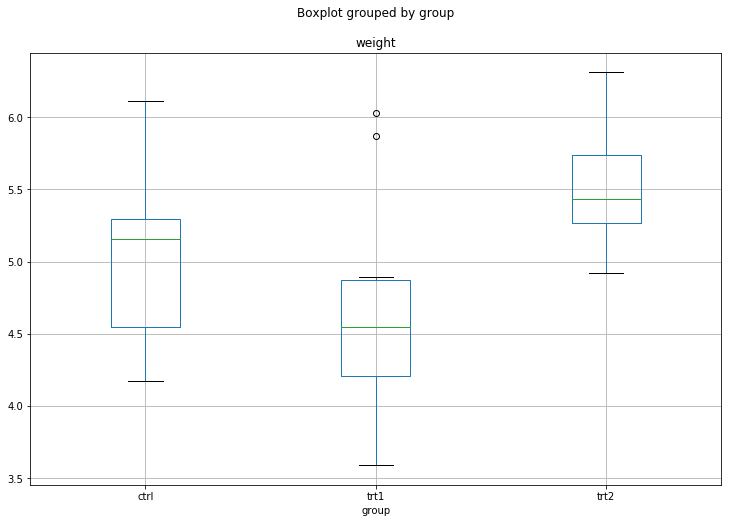

In [4]:
#Create a boxplot
data.boxplot('weight', by='group', figsize=(12, 8))
 
ctrl = data['weight'][data.group == 'ctrl']
 
grps = pd.unique(data.group.values)
d_data = {grp:data['weight'][data.group == grp] for grp in grps}
 
k = len(pd.unique(data.group))  # number of conditions
N = len(data.values)  # conditions times participants
n = data.groupby('group').size()[0] #Participants in each condition

There appears to be a difference in weight for the two treatment groups `trt1` and `trt2` in comparision on the control `ctrl` group. Additionally, `trt1` has known outliers and is negatively skewed, while `trt2` is slightly positively skewed.

### One Way ANOVA

In [6]:
from scipy import stats

F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])
F, p

(4.846087862380136, 0.0159099583256229)